In [1]:
import numpy as np
import pandas as pd


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("matches.csv")

df.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [4]:
df_del = pd.read_csv("deliveries.csv")

df_del.head(2)


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [6]:
df_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df_del.duplicated().sum()

np.int64(0)

In [9]:
df[df['city'].isna()]['venue'].unique()

array(['Sharjah Cricket Stadium', 'Dubai International Cricket Stadium'],
      dtype=object)

In [10]:
df.loc[(df['city'].isna()) & (df['venue'] == 'Sharjah Cricket Stadium'), 'city'] = 'Sharjah' 
df.loc[(df['city'].isna()) & (df['venue'] == 'Dubai International Cricket Stadium'), 'city'] = 'Dubai'
df['city'].isnull().sum()

np.int64(0)

In [11]:
df.replace({'season' : {"2020/21" : "2020", "2009/10" : "2010" , "2007/08" : "2008" }} , inplace=True)

In [12]:
team_map ={"Mumbai Indians":"Mumbai Indians",
          "Chennai Super Kings":"Chennai Super Kings",
          "Kolkata Knight Riders":"Kolkata Knight Riders",
          "Royal Challengers Bangalore":"Royal Challengers Bangalore",
          "Royal Challengers Bengaluru":"Royal Challengers Bangalore",
            "Rajasthan Royals":"Rajasthan Royals",
          "Kings XI Punjab":"Kings XI Punjab",
          "Punjab Kings":"Kings XI Punjab",
          "Sunrisers Hyderabad":"Sunrisers Hyderabad",
          "Deccan Chargers":"Sunrisers Hyderabad",
          "Delhi Capitals":"Delhi Capitals",
          "Delhi Daredevils":"Delhi Capitals",
          "Gujarat Titans":"Gujarat Titans",
          "Gujarat Lions":"Gujarat Titans",
          "Lucknow Super Giants":"Lucknow Super Giants",
           "Pune Warriors":"Pune Warriors",
          "Rising Pune Supergiant":"Pune Warriors",
          "Rising Pune Supergiants":"Pune Warriors",
          "Kochi Tuskers Kerala":"Kochi Tuskers Kerala"}
 
df['team1']= df['team1'].map(team_map)
df['team2']= df['team2'].map(team_map)
df['winner']= df['winner'].map(team_map)
df['toss_winner']= df['toss_winner'].map(team_map)
df_del['batting_team']= df_del['batting_team'].map(team_map)
df_del['bowling_team']= df_del['bowling_team'].map(team_map)

In [13]:
df['season'].value_counts().to_frame().T.sort_index(axis=1)


season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,58,57,60,73,74,76,60,59,60,59,60,60,60,60,74,74,71


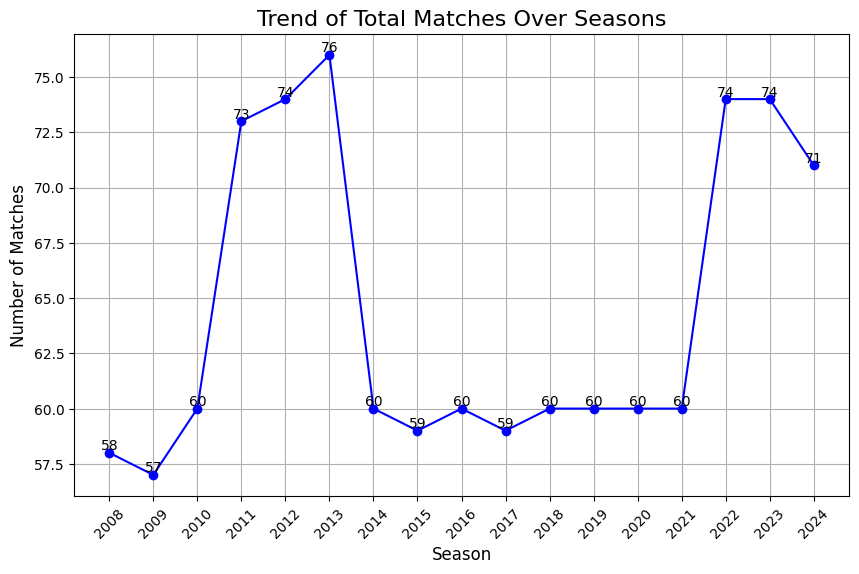

In [14]:
import matplotlib.pyplot as plt

season_counts = df['season'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(season_counts.index, season_counts.values, marker='o', linestyle='-', color='blue')

plt.title('Trend of Total Matches Over Seasons', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)

for i, value in enumerate(season_counts.values):  
    plt.text(season_counts.index[i], value, str(value), fontsize=10, ha='center', va='bottom')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [15]:
df['city'].value_counts().head(5)

city
Mumbai       173
Kolkata       93
Delhi         90
Chennai       85
Hyderabad     77
Name: count, dtype: int64

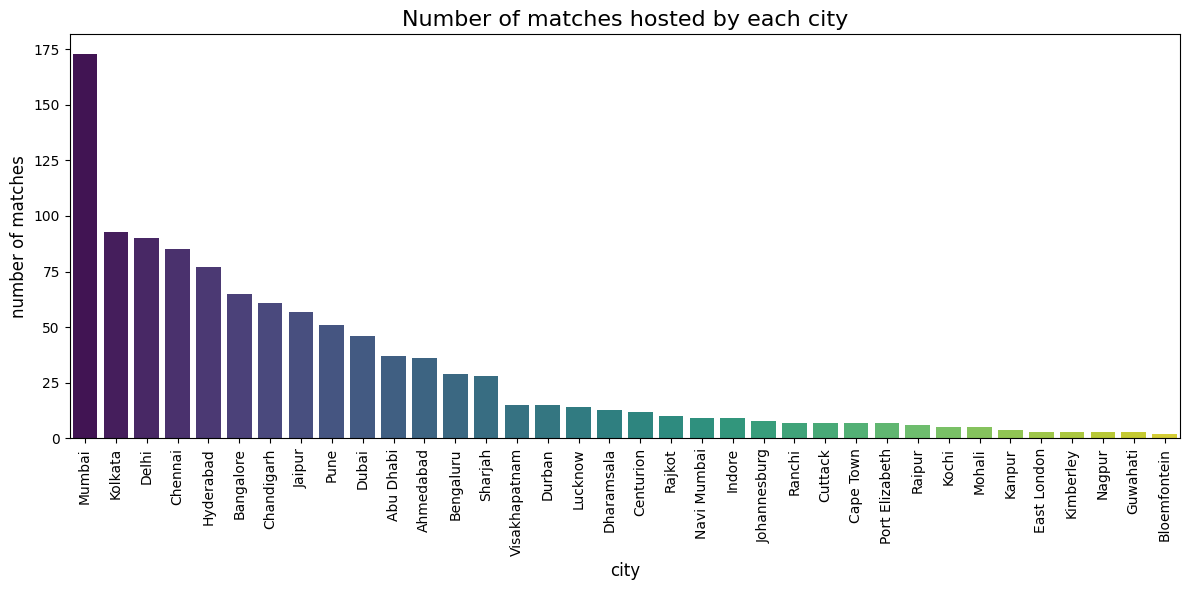

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

city_counts = df['city'].replace(np.nan, 'Unknown').value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')

plt.title('Number of matches hosted by each city', fontsize=16)
plt.xlabel('city', fontsize=12)
plt.ylabel('number of matches', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

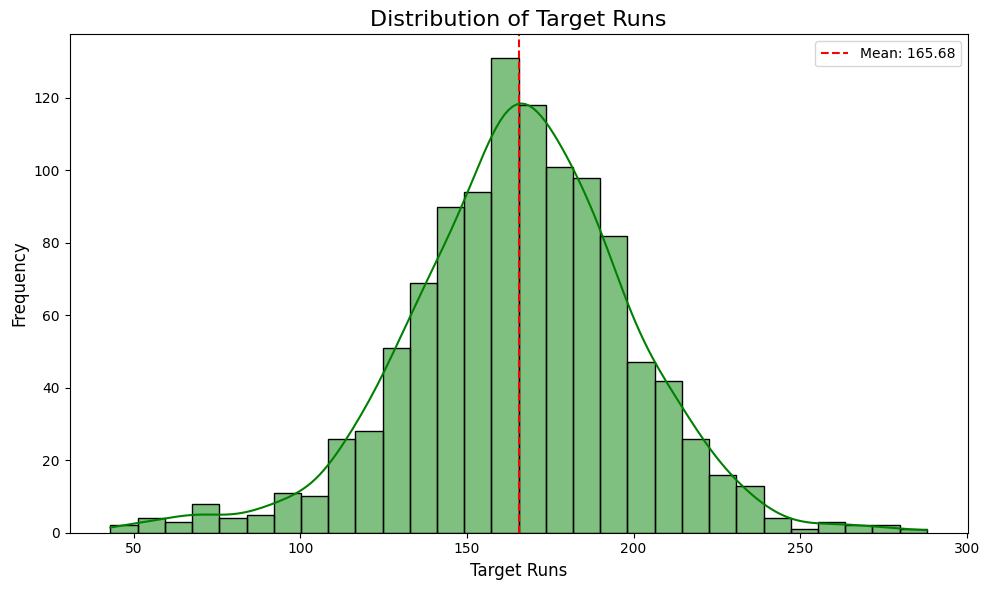

In [17]:
mean_target_runs = df['target_runs'].mean()

plt.figure(figsize=(10,6)) 
sns.histplot(df['target_runs'].dropna(), bins=30, kde=True, color='green')

plt.axvline(mean_target_runs, color='red', linestyle='--', label=f'Mean: {mean_target_runs:.2f}')

plt.title('Distribution of Target Runs', fontsize=16)
plt.xlabel('Target Runs', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()  
plt.show()

In [18]:
print(mean_target_runs)

165.68406593406593


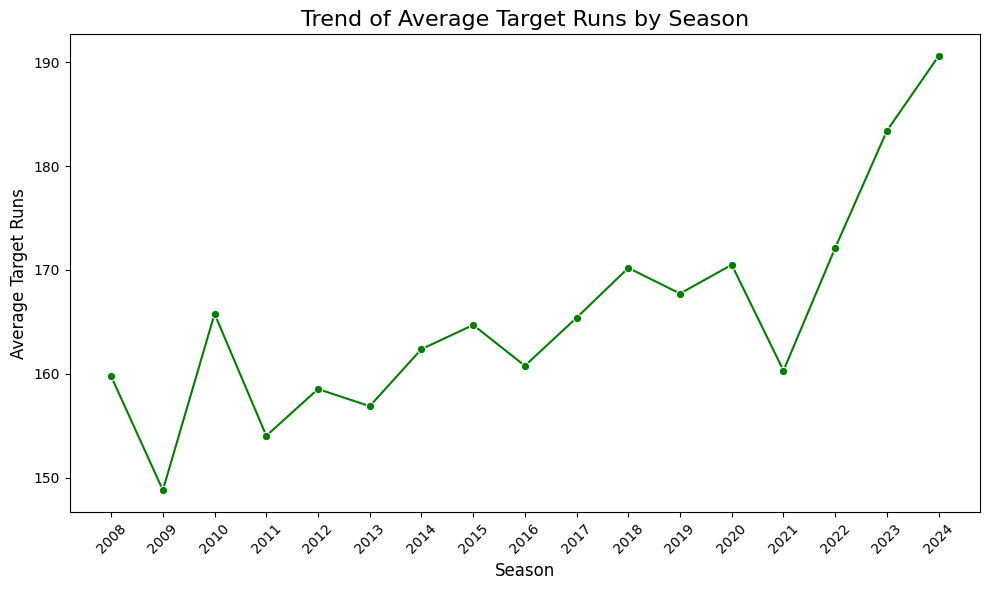

In [19]:
avg_run_byseason = pd.pivot_table(data=df, index='season', values='target_runs', aggfunc='mean')
avg_run_byseason.reset_index(inplace=True)

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_run_byseason, x='season' , y='target_runs', marker='o', color = 'green')

plt.title('Trend of Average Target Runs by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Target Runs', fontsize=12)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

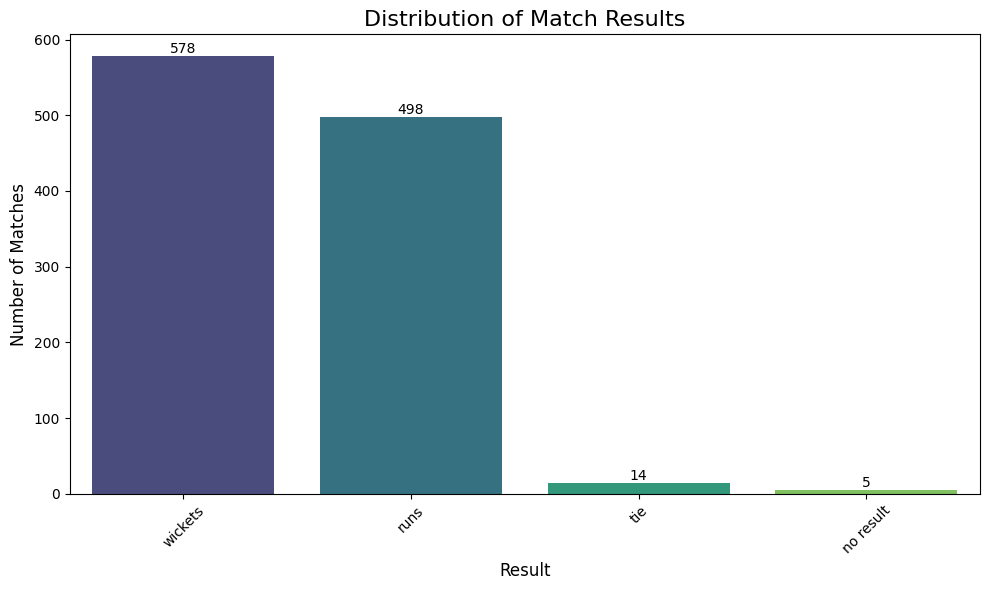

In [20]:
result_distribution = df['result'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=result_distribution.index, y=result_distribution.values, palette='viridis')

plt.title('Distribution of Match Results', fontsize=16)
plt.xlabel('Result', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)

for index, value in enumerate(result_distribution):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

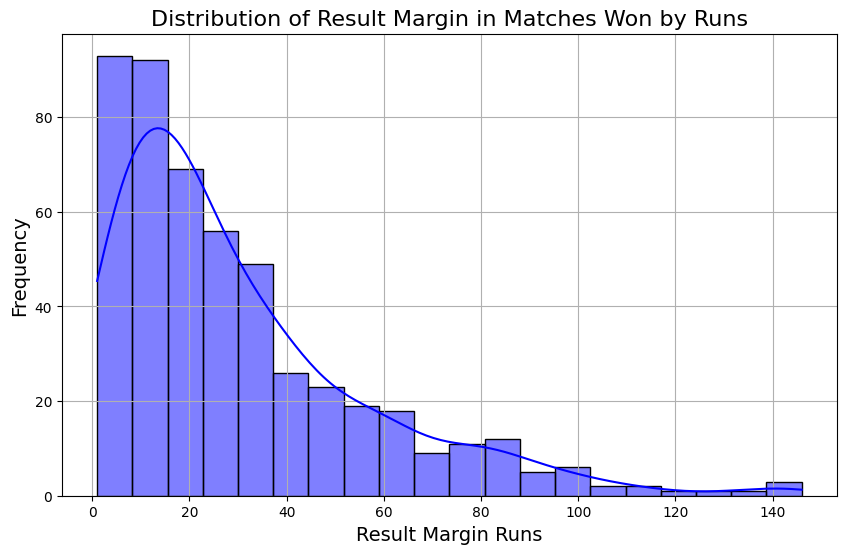

In [21]:
runs_margin = df[df['result'] == 'runs']['result_margin']

plt.figure(figsize=(10, 6))
sns.histplot(runs_margin, bins=20, kde=True, color='blue')

plt.title('Distribution of Result Margin in Matches Won by Runs', fontsize=16)
plt.xlabel('Result Margin Runs', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()

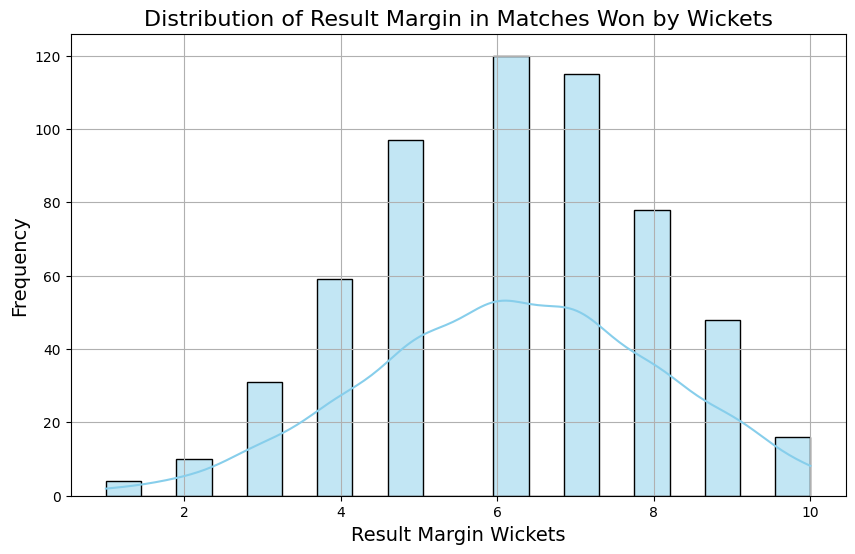

In [22]:
wickets_margin = df[df['result'] == 'wickets']['result_margin']

plt.figure(figsize=(10, 6))
sns.histplot(wickets_margin, bins=20, kde=True, color='skyblue')

plt.title('Distribution of Result Margin in Matches Won by Wickets', fontsize=16)
plt.xlabel('Result Margin Wickets', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()

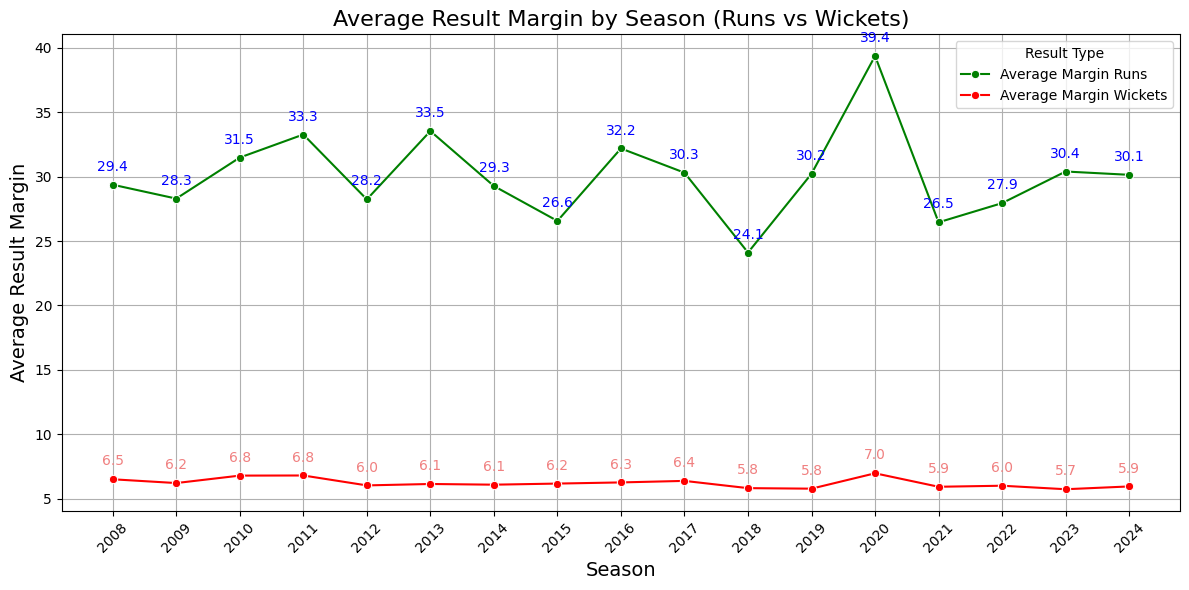

In [23]:
result_margins = df[(df['result'] == 'runs') | (df['result'] == 'wickets')]

avg_result = pd.pivot_table(
    data=result_margins, 
    index='season', 
    columns='result', 
    values='result_margin', 
    aggfunc='mean'
)

avg_result.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_result, x='season', y='runs', marker='o', label='Average Margin Runs', color='green')
sns.lineplot(data=avg_result, x='season', y='wickets', marker='o', label='Average Margin Wickets', color='red')

plt.title('Average Result Margin by Season (Runs vs Wickets)', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Result Margin', fontsize=14)
plt.legend(title='Result Type')

for index, row in avg_result.iterrows():
    plt.annotate(f'{row["runs"]:.1f}', 
                 (row['season'], row['runs']), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color='blue')

    plt.annotate(f'{row["wickets"]:.1f}', 
                 (row['season'], row['wickets']), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color='lightcoral')

plt.grid()
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

  toss_decision  wins  percentage
0           bat   390   35.779817
1         field   700   64.220183


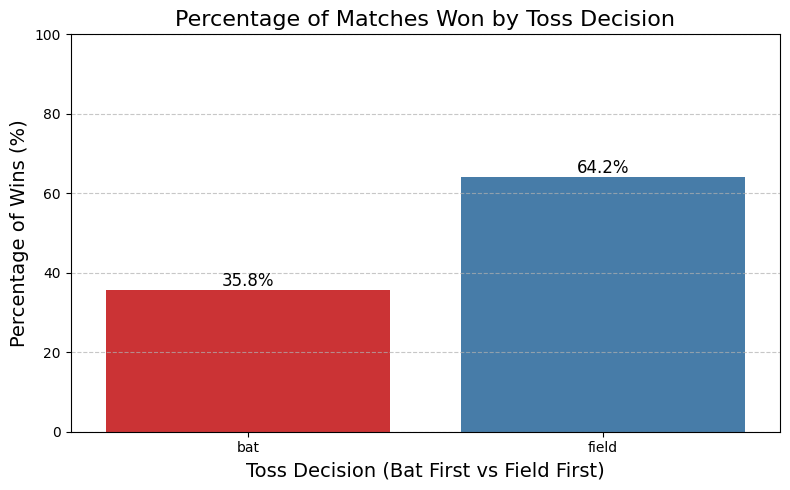

In [24]:
df_clean = df.dropna(subset=['winner'])
wins_by_decision = df_clean.groupby('toss_decision').size().reset_index(name='wins')

total_matches = df_clean.shape[0]
wins_by_decision['percentage'] = (wins_by_decision['wins'] / total_matches) * 100

print(wins_by_decision)
plt.figure(figsize=(8, 5))
sns.barplot(data=wins_by_decision, x='toss_decision', y='percentage', palette='Set1')

plt.title('Percentage of Matches Won by Toss Decision', fontsize=16)
plt.xlabel('Toss Decision (Bat First vs Field First)', fontsize=14)
plt.ylabel('Percentage of Wins (%)', fontsize=14)

for index, row in wins_by_decision.iterrows():
    plt.text(index, row['percentage'] + 1, f'{row["percentage"]:.1f}%', 
             ha='center', fontsize=12)

plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()  
plt.show()

In [25]:
super_over_matches = df[df['super_over'] == 'Y']

super_over_by_season = super_over_matches.groupby('season').size().reset_index(name='super_over_count')

print(super_over_by_season)


  season  super_over_count
0   2009                 1
1   2010                 1
2   2013                 2
3   2014                 1
4   2015                 1
5   2017                 1
6   2019                 2
7   2020                 4
8   2021                 1


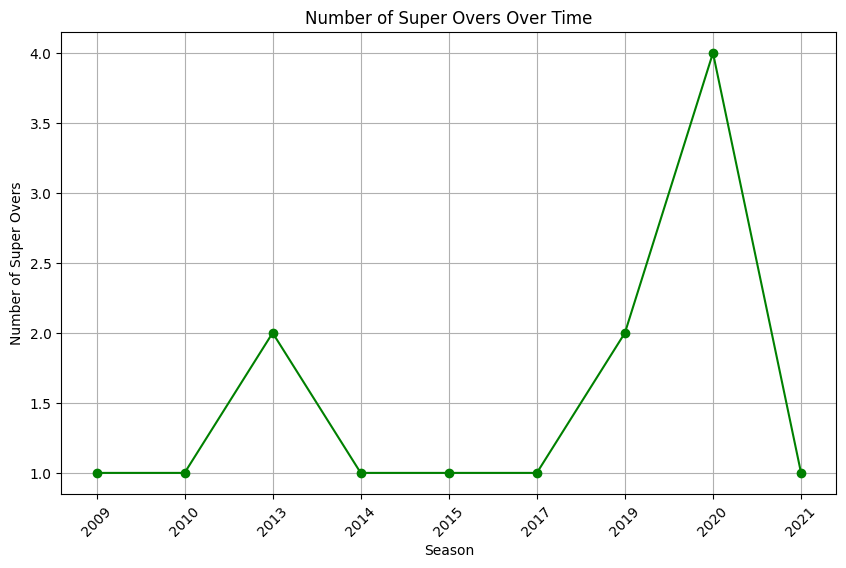

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(super_over_by_season['season'], super_over_by_season['super_over_count'], marker='o', color='g')
plt.title('Number of Super Overs Over Time')
plt.xlabel('Season')
plt.ylabel('Number of Super Overs')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

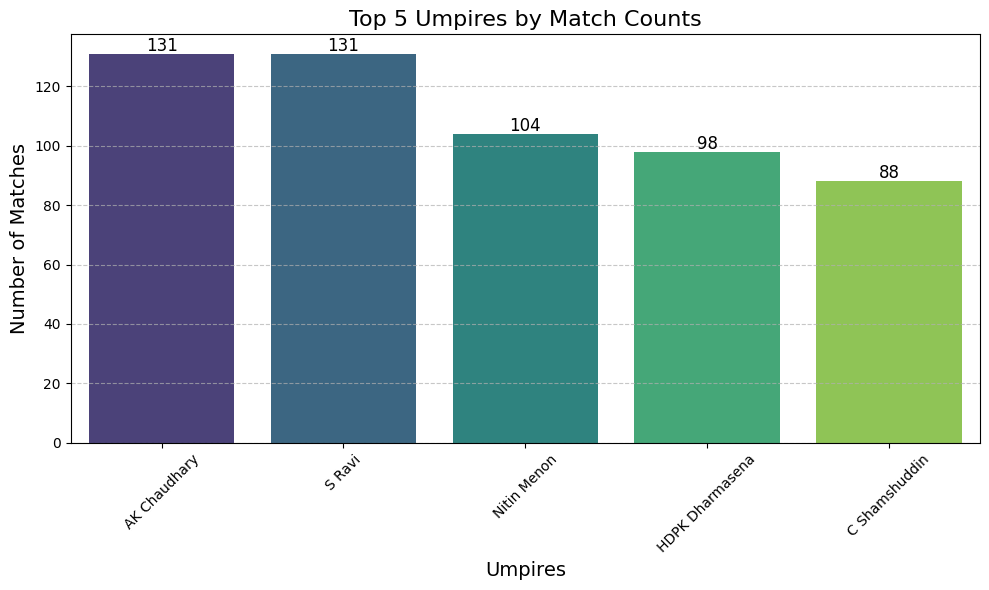

In [27]:
umpire_counts = df['umpire1'].value_counts().add(df['umpire2'].value_counts(), fill_value=0)

umpire_counts = umpire_counts.sort_values(ascending=False)
top_umpires = umpire_counts.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_umpires.index, y=top_umpires.values, palette='viridis')

plt.title('Top 5 Umpires by Match Counts', fontsize=16)
plt.xlabel('Umpires', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.xticks(rotation=45)

for index, value in enumerate(top_umpires.values):
    plt.text(index, value + 1, int(value), ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()  
plt.show()

In [28]:
import pandas as pd

total_matches = (df['team1'].value_counts()+df['team2'].value_counts()).rename_axis('Team').reset_index(name="Total_Match_Played")
total_wins = df['winner'].value_counts().rename_axis('Team').reset_index(name='Total_Wins')
team_chasing = df[df['toss_decision'] == 'field']['winner'].value_counts().rename_axis('Team').reset_index(name='Chasing_Wins')
team_batting_first = df[df['toss_decision'] == 'bat']['winner'].value_counts().rename_axis('Team').reset_index(name='Batting_First_Wins')

merged_df = total_matches.merge(total_wins,on='Team',how='outer') \
    .merge(team_chasing, on='Team', how='outer') \
    .merge(team_batting_first, on='Team', how='outer')

merged_df= merged_df.fillna(0)
merged_df.sort_values(by='Total_Match_Played', ascending=False, inplace=True)

In [29]:
merged_df.set_index('Team', drop=True).sort_values(by='Total_Wins', ascending=False)

,Total_Match_Played,Total_Wins,Chasing_Wins,Batting_First_Wins
Team,,,,
Mumbai Indians,261,144,90,54.0
Chennai Super Kings,238,138,75,63.0
Kolkata Knight Riders,251,131,81,50.0
Royal Challengers Bangalore,255,123,85,38.0
Sunrisers Hyderabad,257,117,73,44.0
Delhi Capitals,252,115,73,42.0
Kings XI Punjab,246,112,84,28.0
Rajasthan Royals,221,112,69,43.0
Gujarat Titans,75,41,30,11.0


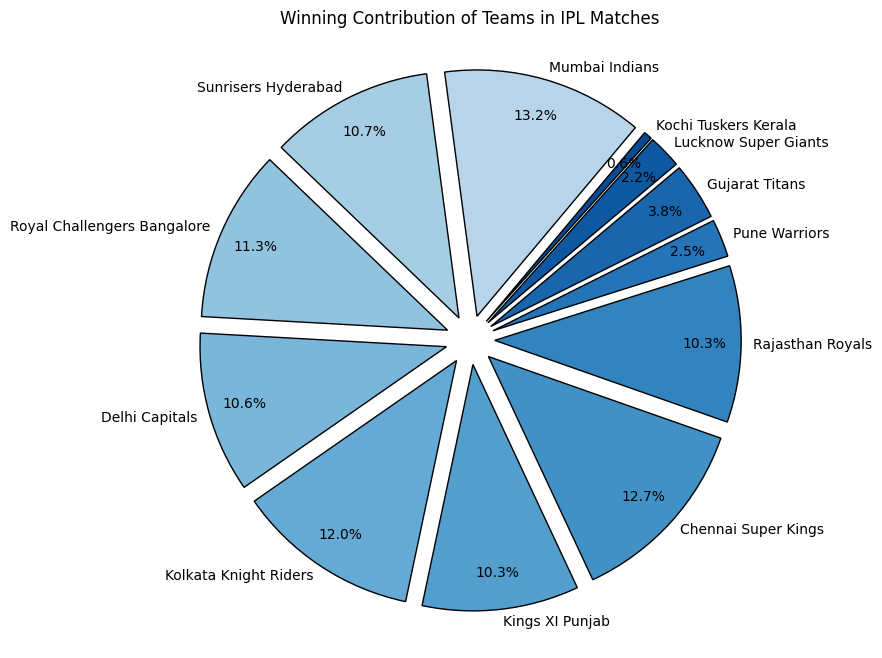

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8))
explode = [0.1] * len(merged_df)  
plt.pie(
    merged_df['Total_Wins'],  
    labels=merged_df['Team'],  
    autopct='%1.1f%%',  
    startangle=50,  
    colors=plt.cm.Blues(np.linspace(0.3, 0.9, len(merged_df))),  
    wedgeprops={'edgecolor': 'black'},  
    explode=explode,  
    pctdistance=0.85,  
    labeldistance=1.05  
)

plt.title('Winning Contribution of Teams in IPL Matches')
plt.show()


In [31]:
percentage_df = merged_df.copy()

percentage_df['Total_Wins'] = (percentage_df['Total_Wins'] / percentage_df['Total_Match_Played']) * 100
percentage_df['Chasing_Wins'] = (percentage_df['Chasing_Wins'] / merged_df['Total_Wins']) * 100
percentage_df['Batting_First_Wins'] = (percentage_df['Batting_First_Wins'] / merged_df['Total_Wins']) * 100

In [32]:
percentage_df.set_index('Team', drop=True).sort_values(by='Total_Wins', ascending=False)

,Total_Match_Played,Total_Wins,Chasing_Wins,Batting_First_Wins
Team,,,,
Chennai Super Kings,238,57.983193,54.347826,45.652174
Mumbai Indians,261,55.172414,62.500000,37.500000
Gujarat Titans,75,54.666667,73.170732,26.829268
Lucknow Super Giants,44,54.545455,75.000000,25.000000
Kolkata Knight Riders,251,52.191235,61.832061,38.167939
Rajasthan Royals,221,50.678733,61.607143,38.392857
Royal Challengers Bangalore,255,48.235294,69.105691,30.894309
Delhi Capitals,252,45.634921,63.478261,36.521739
Kings XI Punjab,246,45.528455,75.000000,25.000000


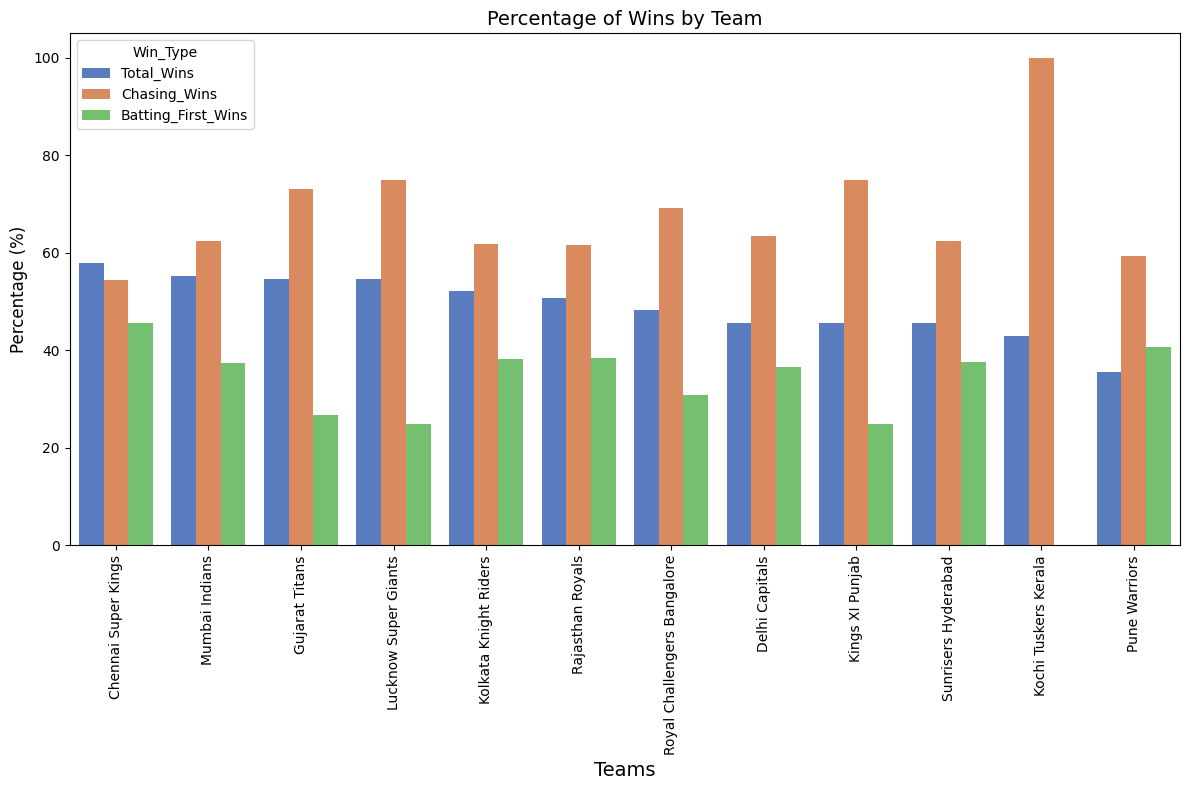

In [33]:
import seaborn as sns

melted_df = percentage_df.sort_values(by='Total_Wins', ascending=False).melt(id_vars='Team', 
                                value_vars=['Total_Wins', 'Chasing_Wins', 'Batting_First_Wins'],
                                var_name='Win_Type', 
                                value_name='Percentage')

plt.figure(figsize=(12, 8))
sns.barplot(data=melted_df, x='Team', y='Percentage', hue='Win_Type', palette='muted')

plt.xlabel('Teams', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Percentage of Wins by Team', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [34]:
import pandas as pd

total_matches = (df['team1'].value_counts() + df['team2'].value_counts()).rename_axis('Team').reset_index(name="Total_Match_Played")
toss_winners = df['toss_winner'].value_counts().rename_axis('Team').reset_index(name='Toss_Win')

team_wins_pivot = pd.pivot_table(
    data=df[df['toss_winner'] == df['winner']],
    index='winner',  
    columns='toss_decision',  
    aggfunc='size',
    fill_value=0
).rename_axis('Team').reset_index().rename(
    columns={'bat': 'Bat_first_win_After_Toss_Win', 'field': 'Chasing_Win_After_Toss_Win'}
)
toss_winner_matches = df[df['toss_winner'] == df['winner']]['winner'].value_counts().rename_axis('Team').reset_index(name='Toss_Win_Match_Win')

merged_df2 = (
    total_matches
    .merge(toss_winners, on='Team', how='outer')
    .merge(toss_winner_matches, on='Team', how='outer')
    .merge(team_wins_pivot, on='Team', how='outer')
)

merged_df2 = merged_df2.fillna(0)
merged_df2.sort_values(by='Total_Match_Played', ascending=False, inplace=True)

print(merged_df2)


                           Team  Total_Match_Played  Toss_Win  \
7                Mumbai Indians                 261       143   
11          Sunrisers Hyderabad                 257       131   
10  Royal Challengers Bangalore                 255       121   
1                Delhi Capitals                 252       130   
5         Kolkata Knight Riders                 251       122   
3               Kings XI Punjab                 246       109   
0           Chennai Super Kings                 238       122   
9              Rajasthan Royals                 221       120   
8                 Pune Warriors                  76        33   
2                Gujarat Titans                  75        37   
6          Lucknow Super Giants                  44        19   
4          Kochi Tuskers Kerala                  14         8   

    Toss_Win_Match_Win  Bat_first_win_After_Toss_Win  \
7                   78                            30   
11                  57                    

In [35]:
sorted_df = merged_df2.set_index('Team').sort_values(by='Toss_Win_Match_Win', ascending=False)
print(merged_df2.columns)
sorted_df

Index(['Team', 'Total_Match_Played', 'Toss_Win', 'Toss_Win_Match_Win',
       'Bat_first_win_After_Toss_Win', 'Chasing_Win_After_Toss_Win'],
      dtype='object')


,Total_Match_Played,Toss_Win,Toss_Win_Match_Win,Bat_first_win_After_Toss_Win,Chasing_Win_After_Toss_Win
Team,,,,,
Mumbai Indians,261,143,78,30,48
Chennai Super Kings,238,122,75,35,40
Kolkata Knight Riders,251,122,68,20,48
Royal Challengers Bangalore,255,121,61,17,44
Delhi Capitals,252,130,61,18,43
Rajasthan Royals,221,120,60,18,42
Sunrisers Hyderabad,257,131,57,23,34
Kings XI Punjab,246,109,45,6,39
Gujarat Titans,75,37,24,3,21


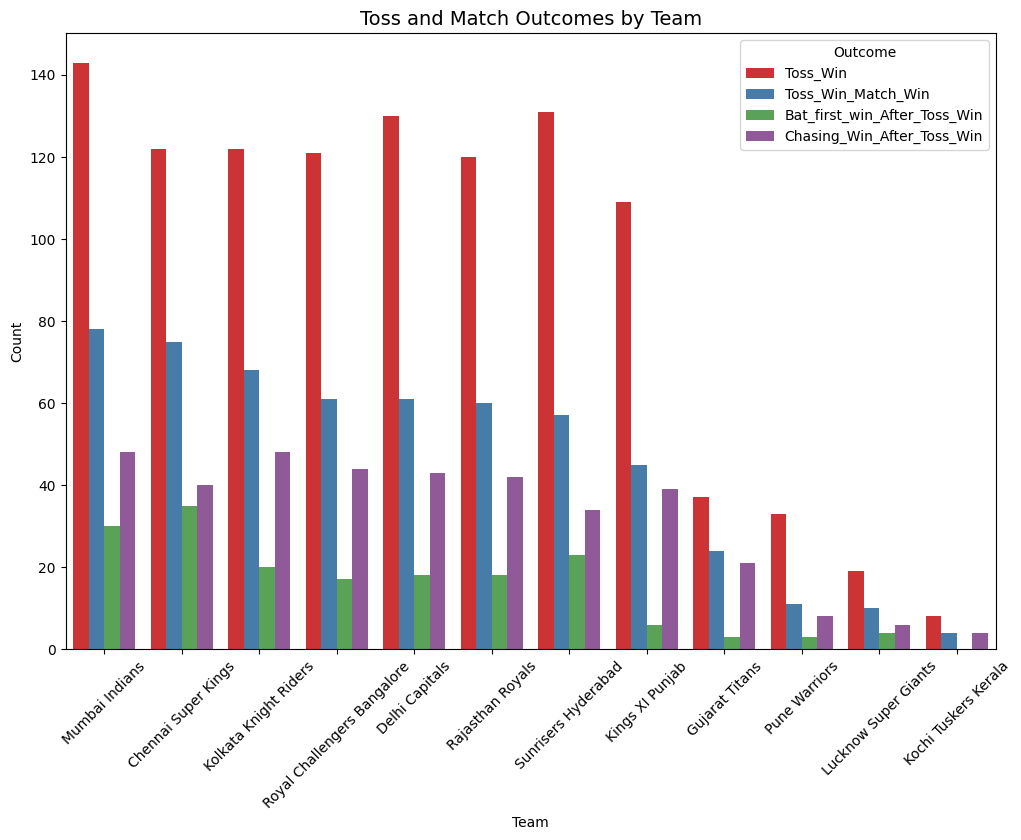

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

melted_df = pd.melt(
    sorted_df.reset_index(),
    id_vars=['Team'], 
    value_vars=['Toss_Win', 'Toss_Win_Match_Win', 'Bat_first_win_After_Toss_Win', 'Chasing_Win_After_Toss_Win'],  # Fixed
    var_name='Outcome',
    value_name='Count'
)

plt.figure(figsize=(12,8))
sns.barplot(data=melted_df, x='Team', y='Count', hue='Outcome', palette='Set1')
plt.xticks(rotation=45)
plt.title("Toss and Match Outcomes by Team", fontsize=14)
plt.show()


In [37]:
percentage_df2 = merged_df2.copy()

percentage_df2['Toss_Win'] = (percentage_df2['Toss_Win'] / merged_df2['Total_Match_Played']) * 100
percentage_df2['Toss_Win_Match_Win'] = (percentage_df2['Toss_Win_Match_Win'] / merged_df2['Toss_Win']) * 100
percentage_df2['Bat_first_win_After_Toss_Win'] = (percentage_df2['Bat_first_win_After_Toss_Win'] / merged_df2['Toss_Win_Match_Win']) * 100
percentage_df2['Chasing_Win_After_Toss_Win'] = (percentage_df2['Chasing_Win_After_Toss_Win'] / merged_df2['Toss_Win_Match_Win']) * 100

In [38]:
percentage_df2.set_index('Team', drop=True).sort_values(by='Toss_Win_Match_Win', ascending=False)


,Total_Match_Played,Toss_Win,Toss_Win_Match_Win,Bat_first_win_After_Toss_Win,Chasing_Win_After_Toss_Win
Team,,,,,
Gujarat Titans,75,49.333333,64.864865,12.500000,87.500000
Chennai Super Kings,238,51.260504,61.475410,46.666667,53.333333
Kolkata Knight Riders,251,48.605578,55.737705,29.411765,70.588235
Mumbai Indians,261,54.789272,54.545455,38.461538,61.538462
Lucknow Super Giants,44,43.181818,52.631579,40.000000,60.000000
Royal Challengers Bangalore,255,47.450980,50.413223,27.868852,72.131148
Kochi Tuskers Kerala,14,57.142857,50.000000,0.000000,100.000000
Rajasthan Royals,221,54.298643,50.000000,30.000000,70.000000
Delhi Capitals,252,51.587302,46.923077,29.508197,70.491803


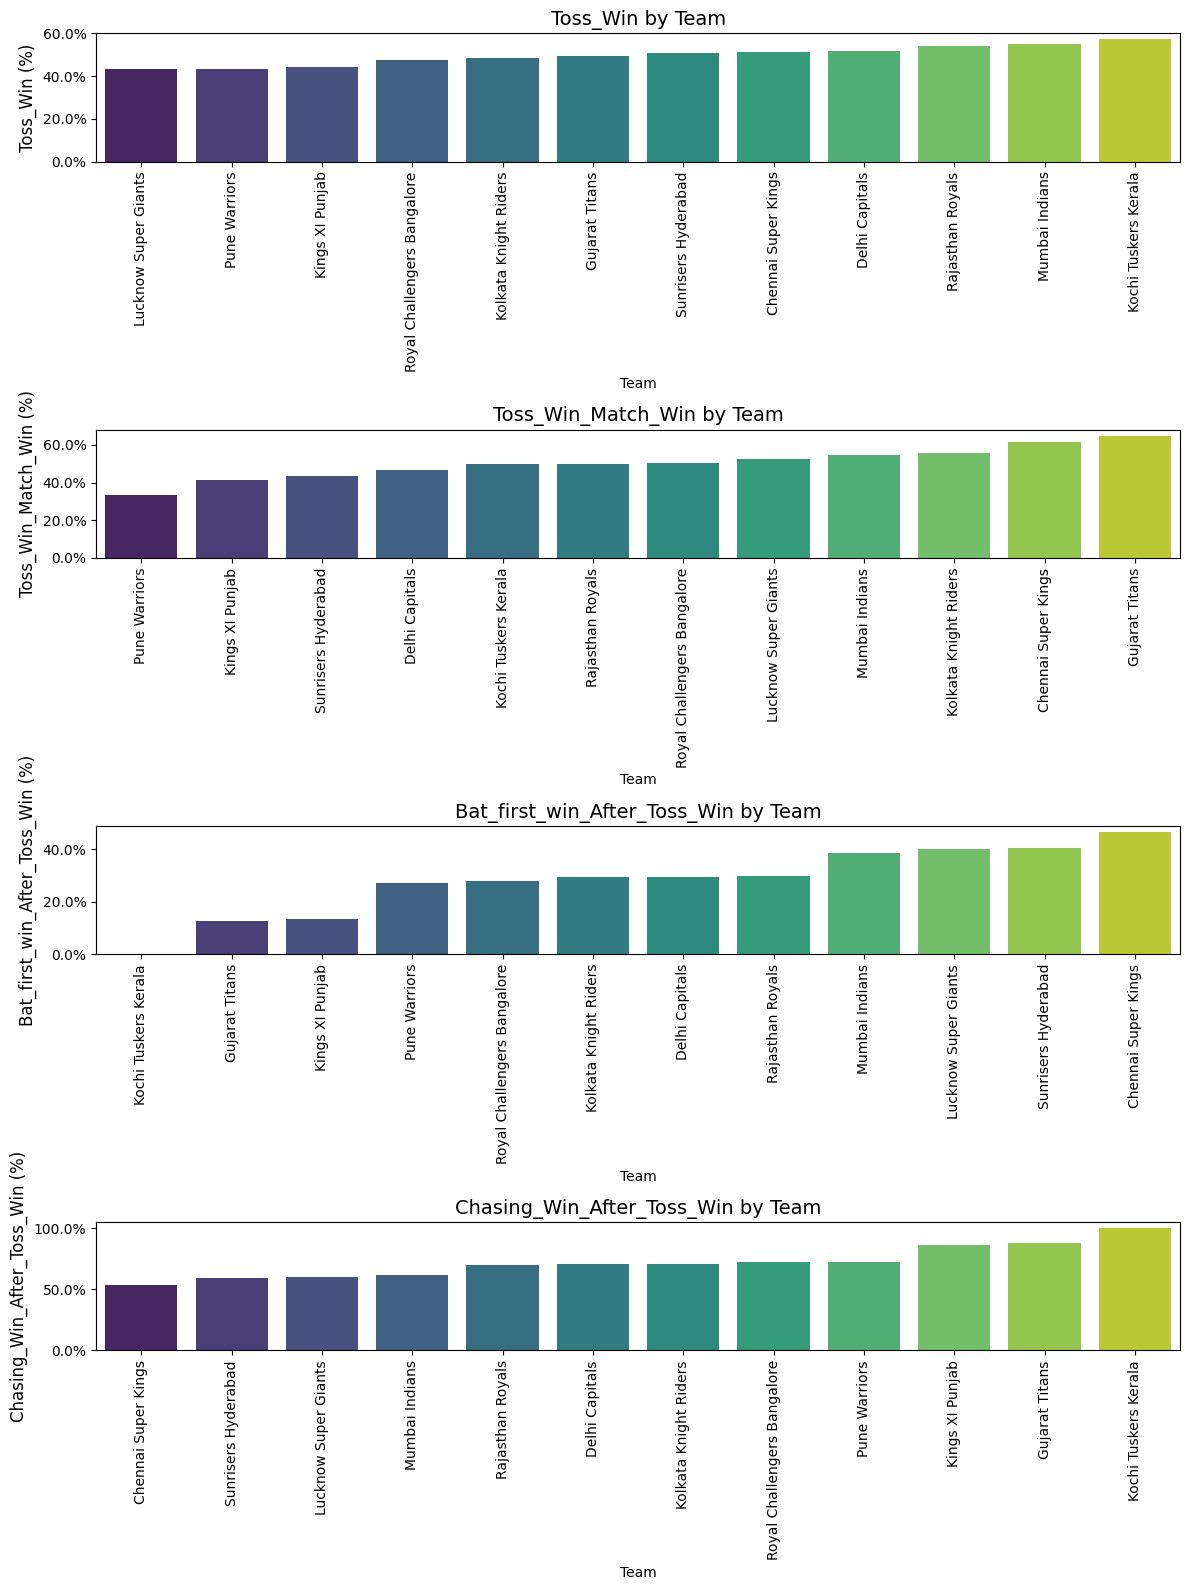

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

percentage_df2.reset_index(drop=True, inplace=True)
columns_to_plot = ['Toss_Win', 'Toss_Win_Match_Win', 'Bat_first_win_After_Toss_Win', 'Chasing_Win_After_Toss_Win']
n_rows = len(columns_to_plot)

plt.figure(figsize=(12, n_rows * 4))  

for i, col in enumerate(columns_to_plot):
    plt.subplot(n_rows, 1, i + 1)  
    
    sorted_df = percentage_df2.sort_values(by=col, ascending=True)
    
    sns.barplot(x='Team', y=col, data=sorted_df, palette='viridis')
    
    plt.title(f'{col} by Team', fontsize=14)  
    plt.xticks(rotation=90, fontsize=10)  
    plt.ylabel(f"{col} (%)", fontsize=12)  
    
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))

plt.tight_layout()  
plt.show()


In [40]:
import pandas as pd

pivot_table = pd.pivot_table(
    data=df_del,
    index='match_id',
    columns='batting_team',
    values='total_runs',
    aggfunc='sum',
    fill_value=0
)

melted_df = pivot_table.reset_index().melt(id_vars='match_id', var_name='batting_team', value_name='total_runs')

filtered_df = melted_df[melted_df['total_runs'] > 0]

filtered_df.head(5)

,match_id,batting_team,total_runs
1,335983,Chennai Super Kings,240
7,335989,Chennai Super Kings,208
11,335993,Chennai Super Kings,152
14,335996,Chennai Super Kings,178
19,336001,Chennai Super Kings,169


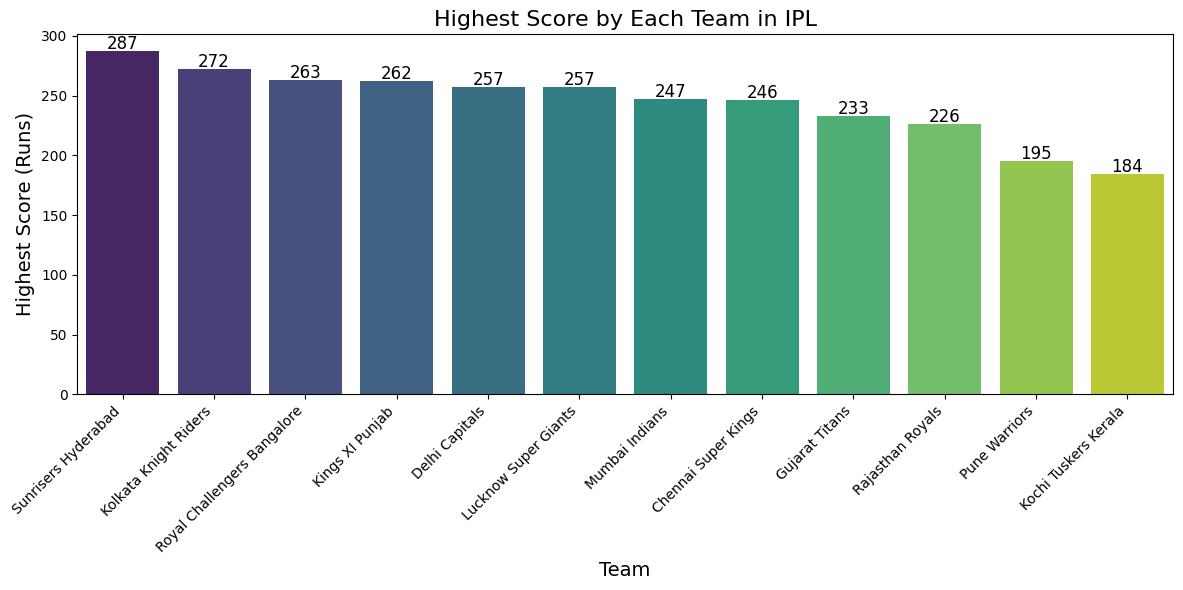

In [41]:
highest_scores = filtered_df.groupby('batting_team')['total_runs'].max().reset_index()
highest_scores_sorted = highest_scores.sort_values(by='total_runs', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 6))

sns.barplot(x='batting_team', y='total_runs', data=highest_scores_sorted, palette='viridis')

for index, value in enumerate(highest_scores_sorted['total_runs']):
    plt.text(index, value + 2, f'{value}', ha='center', fontsize=12)

plt.xlabel('Team', fontsize=14)
plt.ylabel('Highest Score (Runs)', fontsize=14)
plt.title('Highest Score by Each Team in IPL', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

                          Team  200+ Runs Count
0          Chennai Super Kings               29
1  Royal Challengers Bangalore               28
2              Kings XI Punjab               24
3               Mumbai Indians               23
4          Sunrisers Hyderabad               21
5        Kolkata Knight Riders               21
6             Rajasthan Royals               20
7               Delhi Capitals               16
8               Gujarat Titans                8
9         Lucknow Super Giants                7


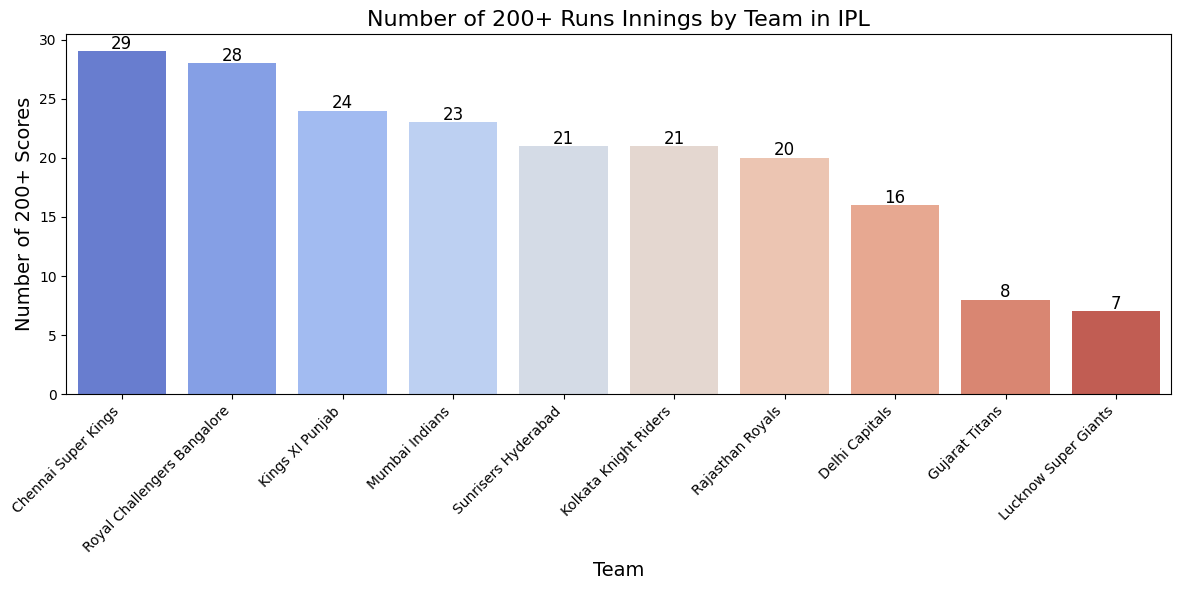

In [44]:
high_scores_df = filtered_df[filtered_df['total_runs'] > 200]
team_200_plus_count = high_scores_df.groupby('batting_team')['total_runs'].count().reset_index()
team_200_plus_count.columns = ['Team', '200+ Runs Count']
team_200_plus_count_sorted = team_200_plus_count.sort_values(by='200+ Runs Count', ascending=False).reset_index(drop=True)

print(team_200_plus_count_sorted)

plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='200+ Runs Count', data=team_200_plus_count_sorted, palette='coolwarm')
for index, value in enumerate(team_200_plus_count_sorted['200+ Runs Count']):
    plt.text(index, value + 0.2, str(value), ha='center', fontsize=12)

plt.xlabel('Team', fontsize=14)
plt.ylabel('Number of 200+ Scores', fontsize=14)
plt.title('Number of 200+ Runs Innings by Team in IPL', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()   

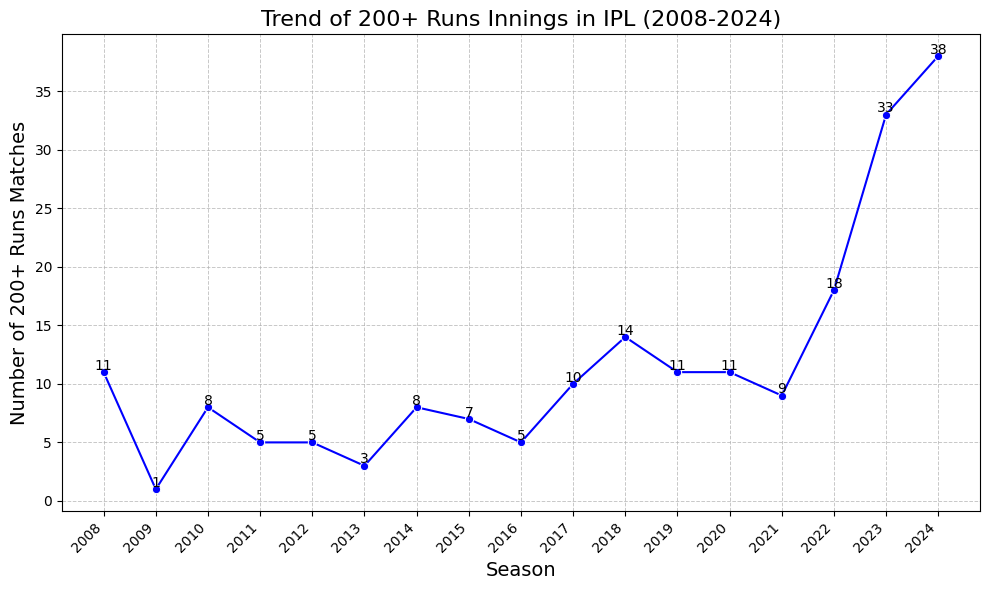

In [46]:
season_df = df[['id', 'season']]

season_merged= pd.merge(season_df, filtered_df, left_on='id', right_on ='match_id' , how='inner')
season_merged_filter = season_merged[season_merged['total_runs'] > 200]

seasonwise200 = season_merged_filter.groupby('season')['total_runs'].count()

seasonwise200_sorted = seasonwise200.sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(x=seasonwise200_sorted.index, y=seasonwise200_sorted.values, marker='o', color='b')

for index, value in enumerate(seasonwise200_sorted.values):
    plt.text(index, value + 0.2, str(value), ha='center', fontsize=10)

plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

plt.xlabel('Season', fontsize=14)
plt.ylabel('Number of 200+ Runs Matches', fontsize=14)
plt.title('Trend of 200+ Runs Innings in IPL (2008-2024)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

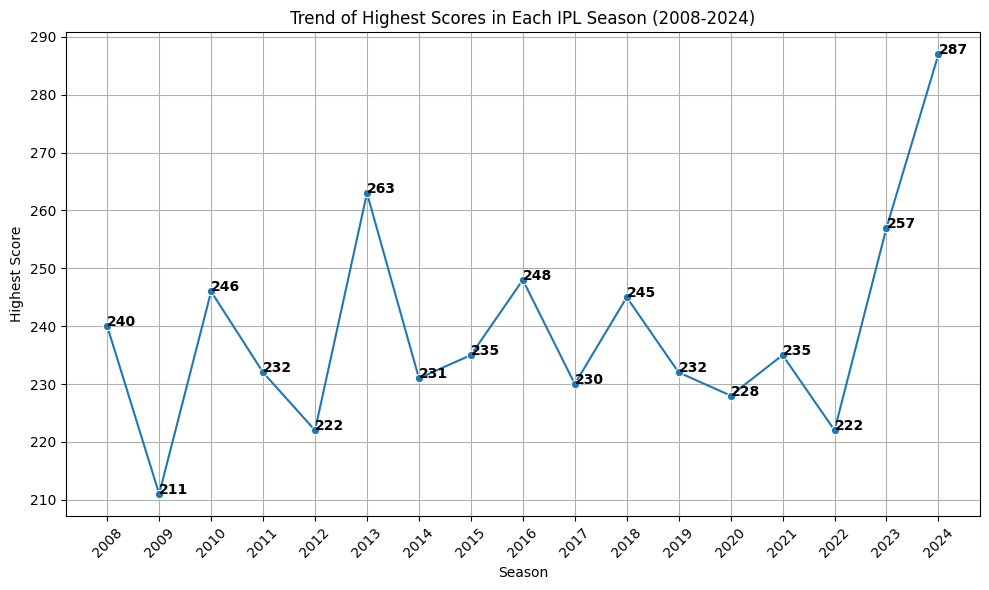

In [47]:
seasonwise_maxscore= season_merged_filter[['season','total_runs']]
seasonwise_maxscore =seasonwise_maxscore.groupby('season')['total_runs'].max().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=seasonwise_maxscore, x='season', y='total_runs', marker='o')

for index, row in seasonwise_maxscore.iterrows():
    plt.text(row['season'], row['total_runs'], row['total_runs'], 
             horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Trend of Highest Scores in Each IPL Season (2008-2024)')
plt.xlabel('Season')
plt.ylabel('Highest Score')
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()
